## Library

In [94]:
%load_ext autoreload
%autoreload 2

# 7DT Library
from simulator import *
register_custom_filters_on_speclite()

plt.style.use('dark_background') # Dark Mode Style

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Use `med25nm`, `med50nm`, `broad` as `group_name`


In [3]:
from simulator.response import *

<Axes: xlabel='Wavelength [$\\rm \\AA$]', ylabel='Efficiency [%]'>

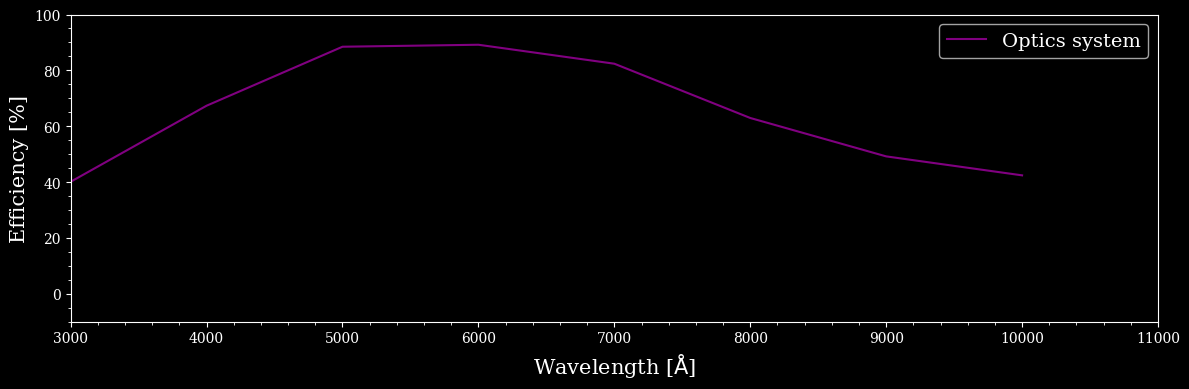

In [4]:
plot_table(get_optics())

<Axes: xlabel='Wavelength [$\\rm \\AA$]', ylabel='Quentum Efficiency [%]'>

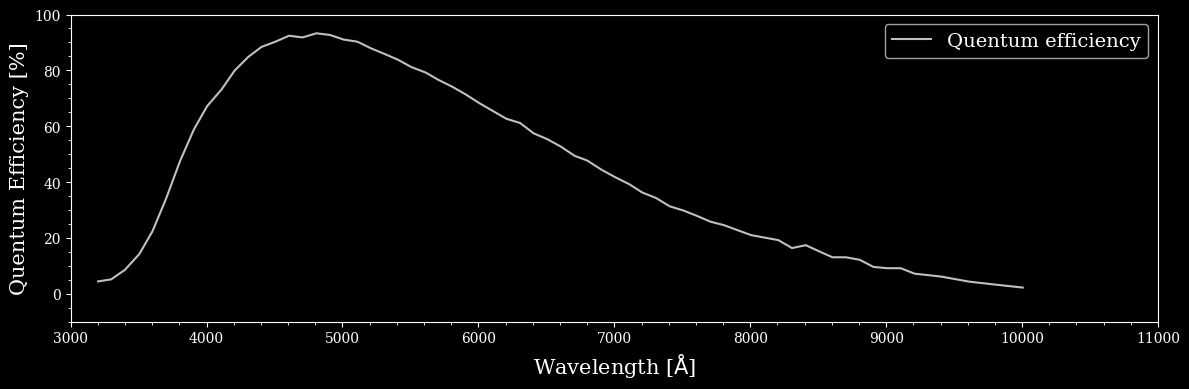

In [5]:
plot_table(get_QE_factor())

<Axes: xlabel='Wavelength [$\\rm \\AA$]', ylabel='Transmission [%]'>

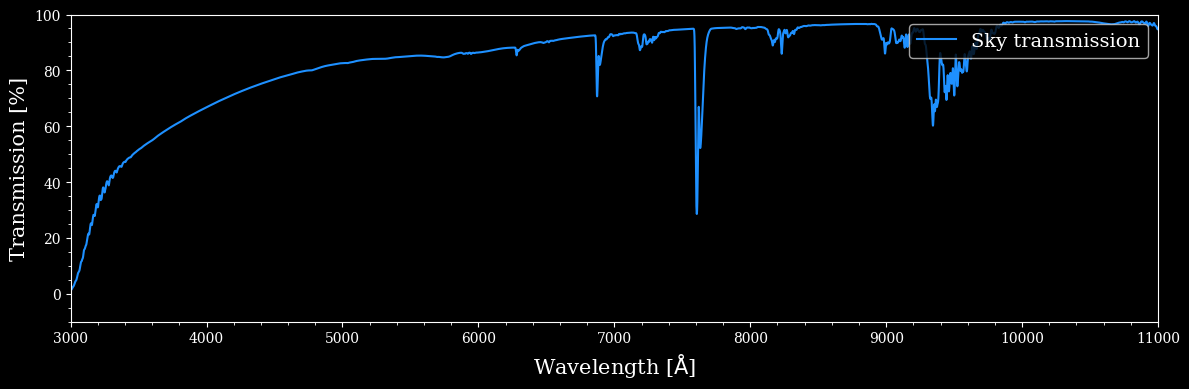

In [7]:
plot_table(get_sky_transmission())

# 7DT Modules

In [39]:
#Subsequent filter info [AA]
bandmin=4000
bandmax=9000
bandwidth=250
bandstep=125
#Maximum transmission of each filters
bandrsp=0.95
#Wavelength bin [AA]
lammin=1000
lammax=10000
lamres=1000
#Seeing Condition
seeing = 1.5

- Calculate Exposure Times

In [9]:
n_yr = 5.
eff_factor = 0.7
exptime_single = 180.
#
inv_cadence_ris = 365./365.
inv_cadence_wfs = 365./10.
inv_cadence_ims = 365./1.
#
exptime_ris = exptime_single * inv_cadence_ris
exptime_wfs = n_yr * exptime_single * inv_cadence_wfs * eff_factor
exptime_ims = n_yr * exptime_single * inv_cadence_ims * eff_factor

print(f"RIS: {exptime_ris:.3f} sec (={exptime_ris/60:.3f} min)")
print(f"WFS: {exptime_wfs:.3f} sec (={exptime_wfs/60:.3f} min)")
print(f"IMS: {exptime_ims:.3f} sec (={exptime_ims/60:.3f} min)")

RIS: 180.000 sec (=3.000 min)
WFS: 22995.000 sec (=383.250 min)
IMS: 229950.000 sec (=3832.500 min)


- RIS

Adopt the default 7DT filterset


<Axes: xlabel='Wavelength [$\\rm \\AA$]', ylabel='Response [%]'>

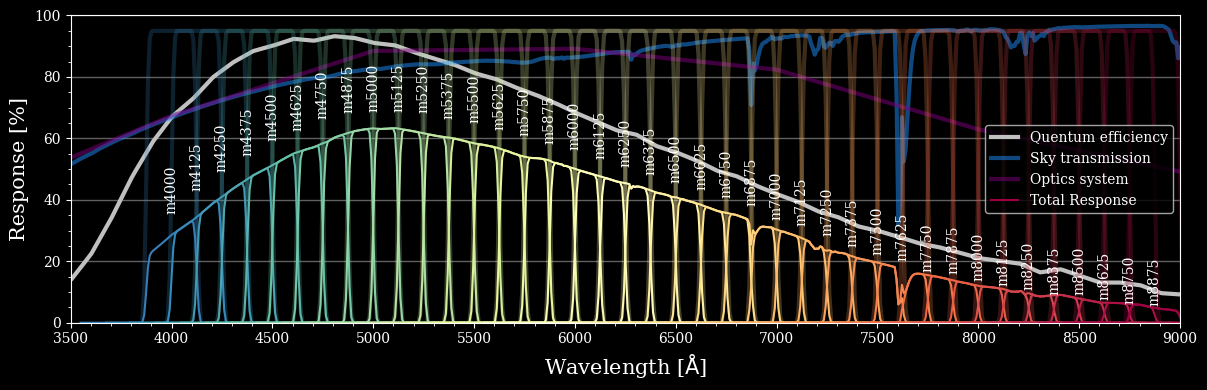

In [101]:
sdt = SevenDT()
sdt.plot_response()

Adopt the default 7DT filterset


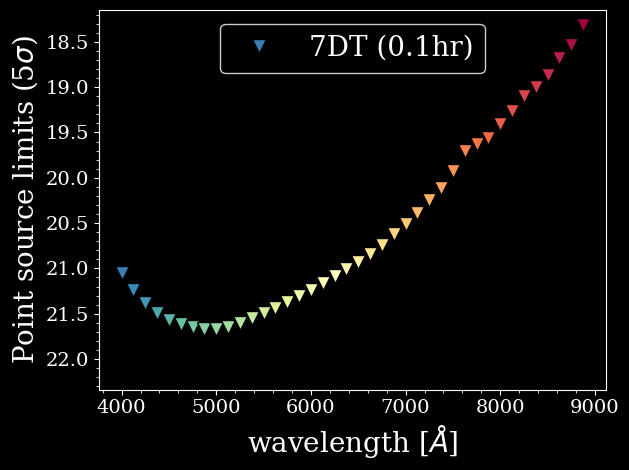

In [90]:
#	Exposure Time [s]
sdt_ris = SevenDT()
sdt_ris.initalize(exposure=exptime_ris, fwhm_seeing=seeing)
sdt_ris.plot_point_source_depth()

- WFS

Adopt the default 7DT filterset


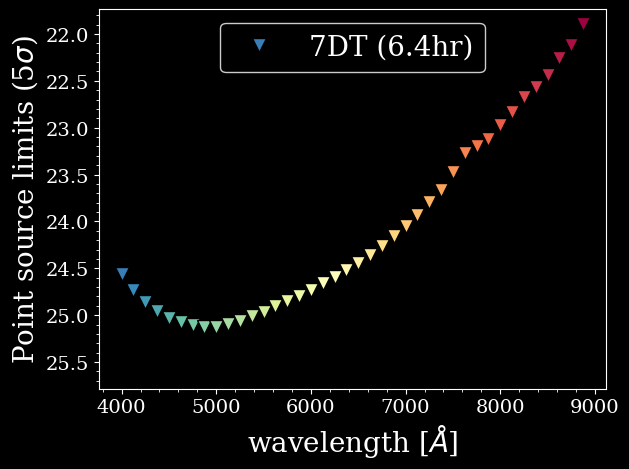

In [89]:
#	Exposure Time [s]
wfs_filter = Filter.tophat_filterset(bandmin=bandmin, bandmax=bandmax, bandwidth=bandwidth, bandstep=bandstep, bandrsp=bandrsp, lammin=lammin, lammax=lammax, lamres=lamres)
sdt_wfs = SevenDT(wfs_filter)
sdt_wfs.initalize(exposure=exptime_wfs, fwhm_seeing=seeing)
sdt_wfs.plot_point_source_depth()

- IMS

Adopt the default 7DT filterset


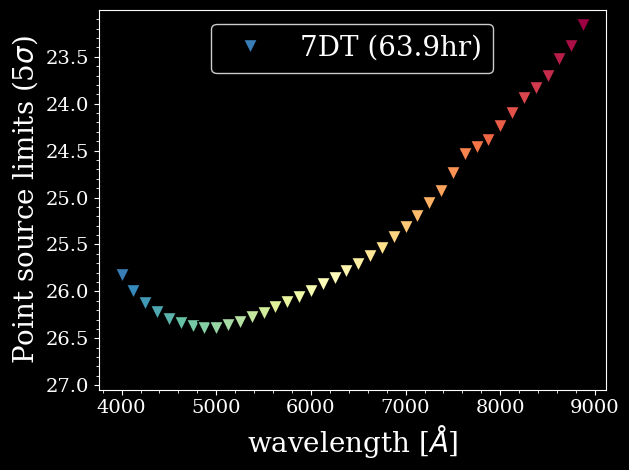

In [88]:
#	Exposure Time [s]
sdt_ims = SevenDT()
sdt_ims.initalize(exposure=exptime_ims, fwhm_seeing=seeing)
sdt_ims.plot_point_source_depth()